In [82]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [84]:
df=pd.read_csv('/content/drive/MyDrive/adult.data', encoding='ISO-8859-1')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,23,Private,529223,Bachelors,13,Never-married,Sales,Own-child,Black,Male,0,0,10,United-States,<=50K
17184,22,Private,202871,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,44,United-States,<=50K
17185,37,Private,58337,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,>50K
17186,58,Federal-gov,298643,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [85]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [86]:
column_names = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']

In [87]:
df=pd.DataFrame(df.values,columns=column_names)

In [88]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,23,Private,529223,Bachelors,13,Never-married,Sales,Own-child,Black,Male,0,0,10,United-States,<=50K
17184,22,Private,202871,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,44,United-States,<=50K
17185,37,Private,58337,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,>50K
17186,58,Federal-gov,298643,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [89]:
df.shape

(17188, 15)

In [90]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            1
dtype: int64

In [91]:
df.nunique()

age                  71
workclass             9
fnlwgt            13310
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        114
capital-loss         82
hours-per-week       90
native-country       42
Income                2
dtype: int64

In [92]:
df['age'].min()  #min value in the selected column of AGE

17

In [93]:
df['age'].max()  #max value in the selected column of age

90

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17188 entries, 0 to 17187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17188 non-null  object
 1   workclass       17188 non-null  object
 2   fnlwgt          17188 non-null  object
 3   education       17188 non-null  object
 4   education-num   17188 non-null  object
 5   marital-status  17188 non-null  object
 6   occupation      17188 non-null  object
 7   relationship    17188 non-null  object
 8   race            17188 non-null  object
 9   sex             17188 non-null  object
 10  capital-gain    17188 non-null  object
 11  capital-loss    17188 non-null  object
 12  hours-per-week  17188 non-null  object
 13  native-country  17188 non-null  object
 14  Income          17187 non-null  object
dtypes: object(15)
memory usage: 2.0+ MB


In [95]:
df=df.infer_objects() #to infer the best data type for each column in a DataFrame


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17188 entries, 0 to 17187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             17188 non-null  int64 
 1   workclass       17188 non-null  object
 2   fnlwgt          17188 non-null  int64 
 3   education       17188 non-null  object
 4   education-num   17188 non-null  int64 
 5   marital-status  17188 non-null  object
 6   occupation      17188 non-null  object
 7   relationship    17188 non-null  object
 8   race            17188 non-null  object
 9   sex             17188 non-null  object
 10  capital-gain    17188 non-null  int64 
 11  capital-loss    17188 non-null  int64 
 12  hours-per-week  17188 non-null  int64 
 13  native-country  17188 non-null  object
 14  Income          17187 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [97]:
df['Income']=df['Income'].str.strip() #emoves leading and trailing whitespace from each element in the specified column, leading to cleaner values

In [98]:
df['Income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
17183    <=50K
17184    <=50K
17185     >50K
17186    <=50K
17187      NaN
Name: Income, Length: 17188, dtype: object

In [99]:
n_records=df.shape[0]

n_greater_50k=df[df['Income']=='>50K'].shape[0]

n_at_most_50k=df[df['Income']=='<=50K'].shape[0]

greater_percent=(n_greater_50k/n_records)*100

#to compute the percentage of individuals in the dataset whose income is greater than $50K and store it in the variable 'greater_percent'.

In [100]:
n_records

17188

In [101]:
print('Individuals making more than 50K:{}'.format(n_greater_50k))

Individuals making more than 50K:4110


In [102]:
print('Individuals making less than 50K or equal to 50K:{}'.format(n_at_most_50k))

Individuals making less than 50K or equal to 50K:13077


In [103]:
greater_percent

23.912031649988364

VISUALIZATIONS

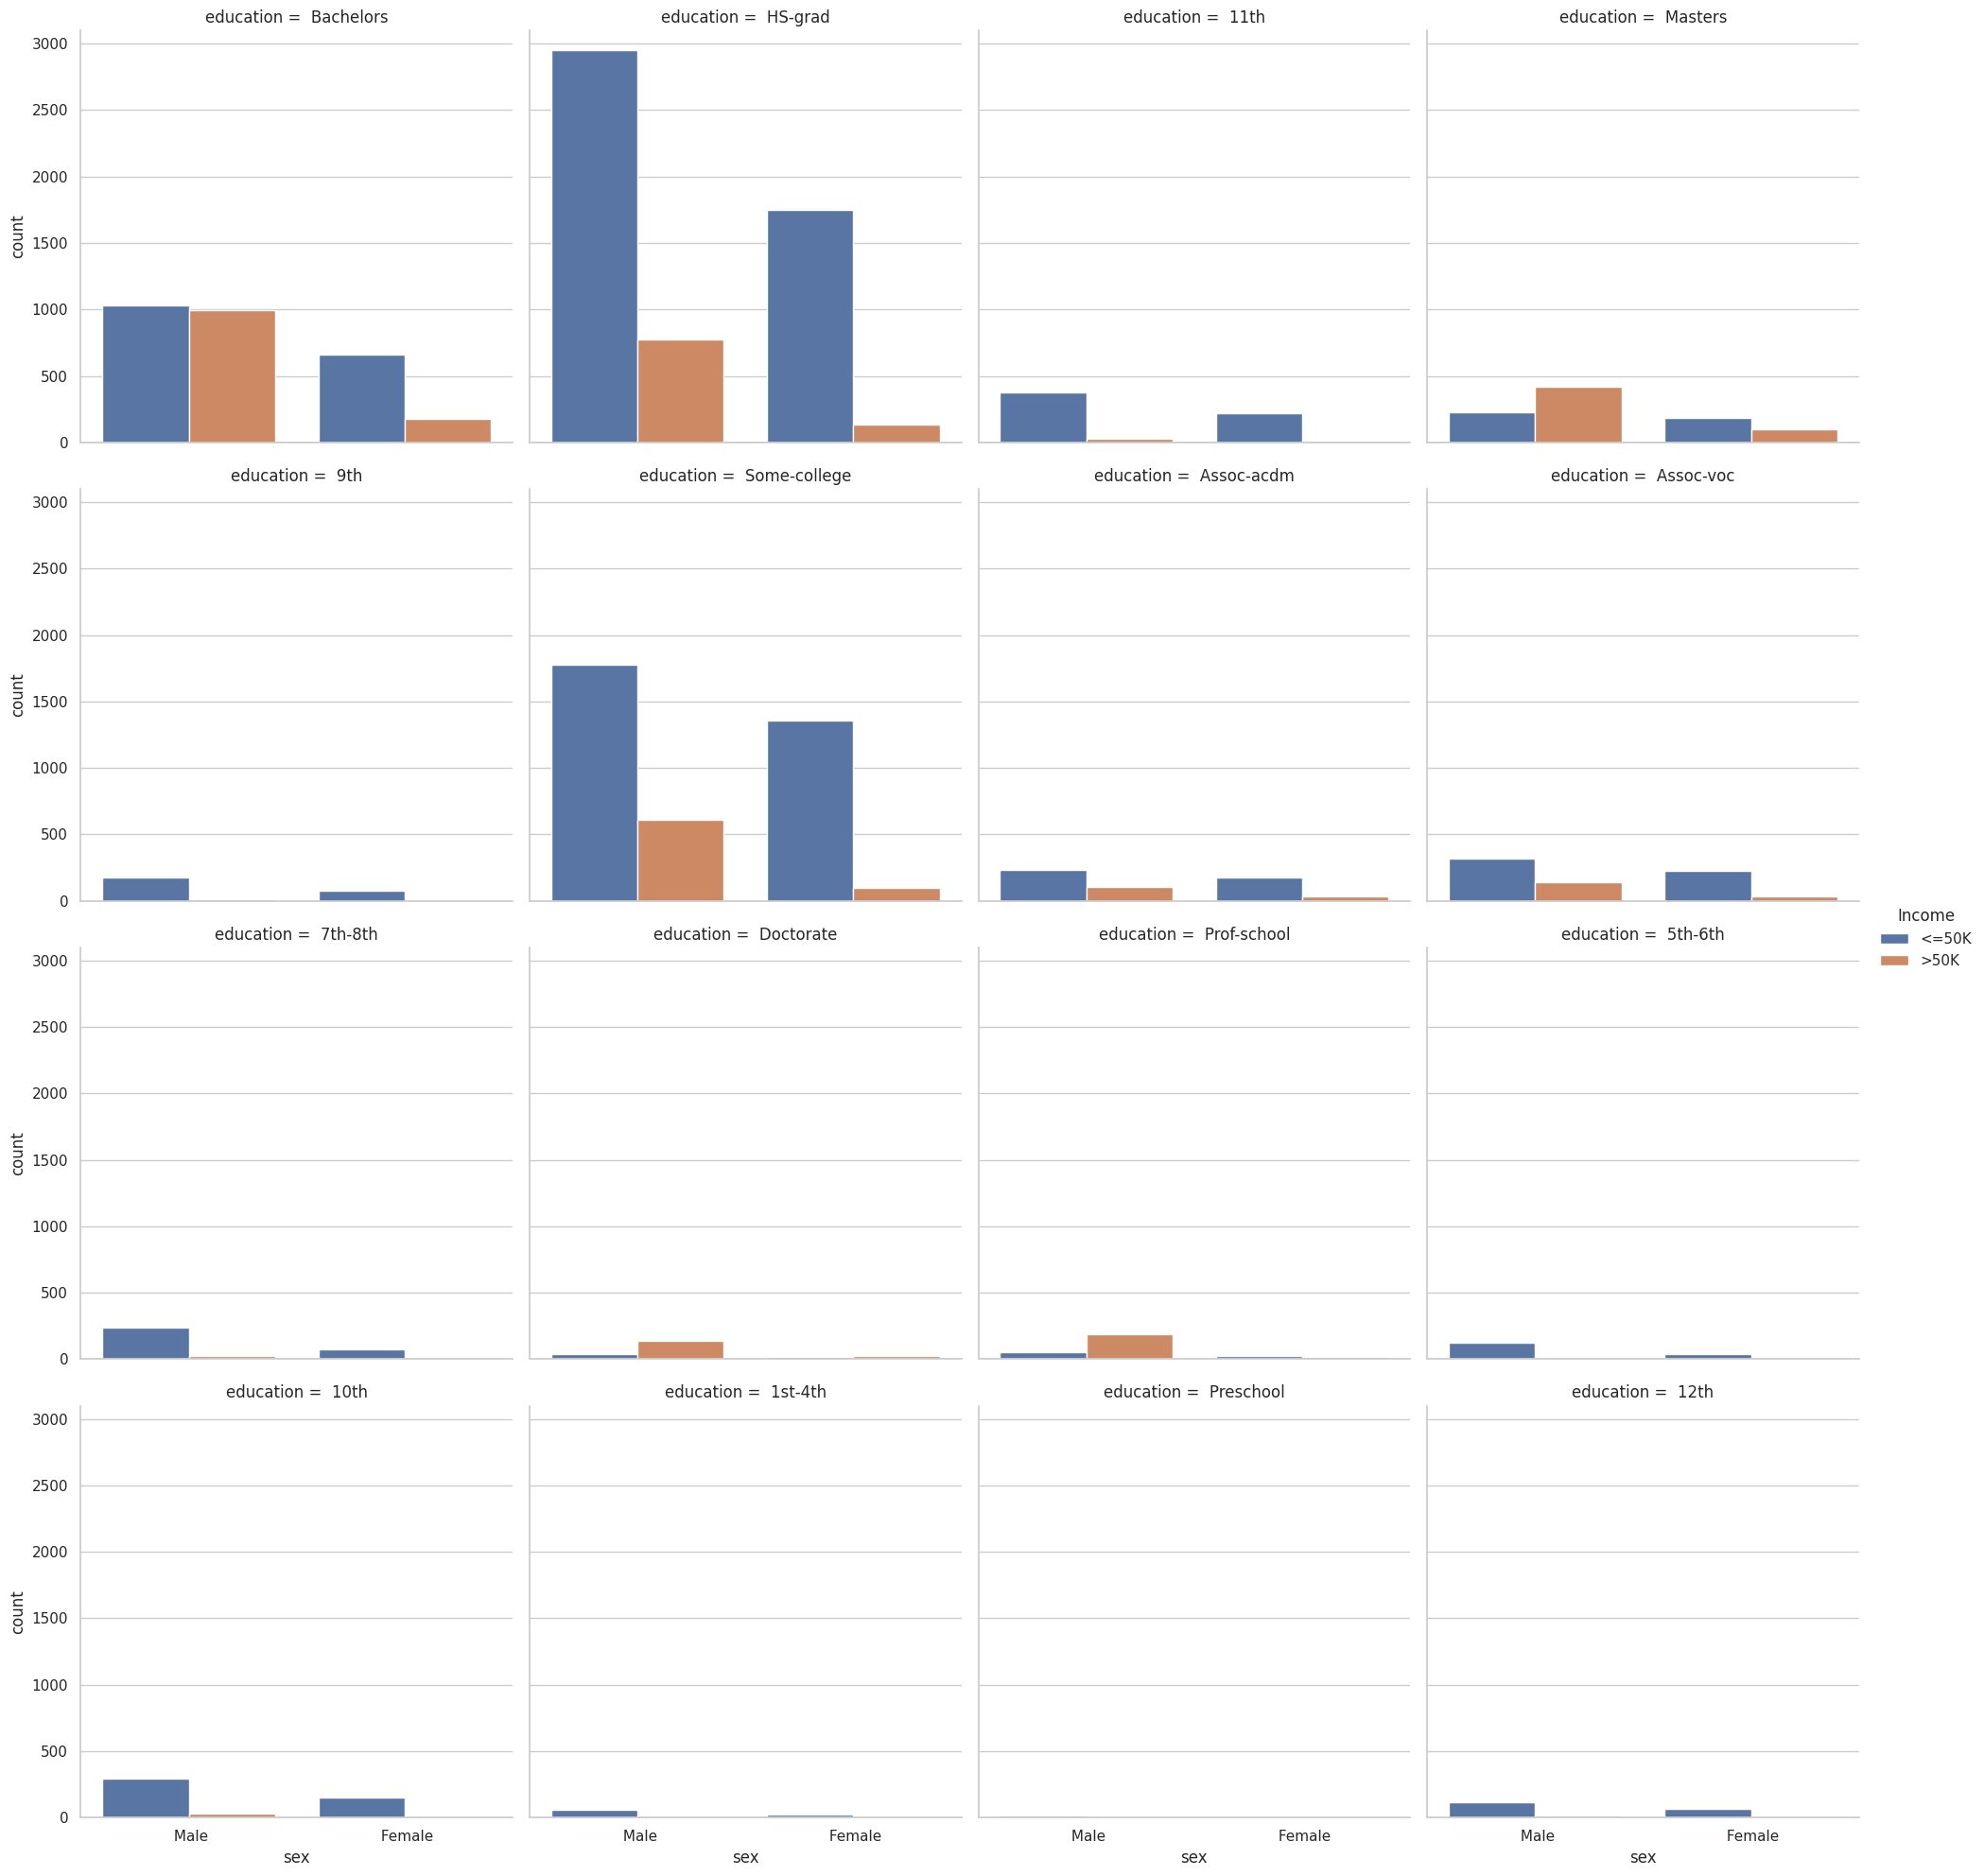

In [104]:
import seaborn as sns   #Seaborn library, commonly used for statistical data visualization
import matplotlib.pyplot as plt

sns.set(style='whitegrid', color_codes=True)         #sets the aesthetic style of the plots created by Seaborn, It specifies a whitegrid background style and enables color-coded elements.
sns.catplot(x="sex", col='education', data=df, hue='Income', kind='count', col_wrap=4)      #creates a categorical plot (catplot), sex column represented on x axis
plt.show()


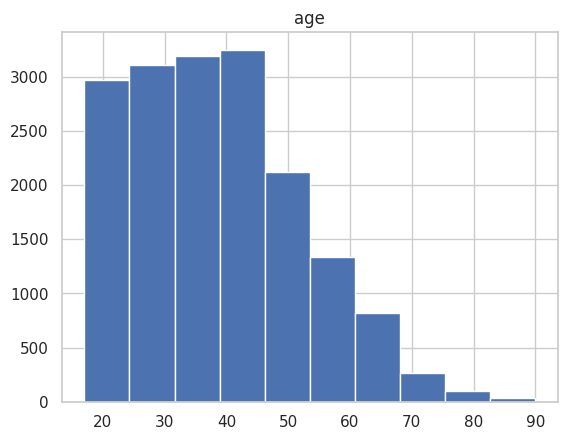

In [105]:
df.hist(column='age')   #creates a histogram of the 'age' column
plt.show()

In [106]:
df.drop(['fnlwgt'],axis=1,inplace=True)
#used to remove the column named 'fnlwgt' from the DataFrame
#xis=1: This parameter indicates that we are dropping columns, not rows. The value 1 for the axis parameter refers to columns.
#If we want to drop rows, we would use axis=0.

In [107]:
df[df['occupation']==' ?']
#to select only those rows where the value in the 'occupation' column is equal to ' ?'.

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,20,?,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,<=50K
17095,25,?,Some-college,10,Never-married,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K
17097,49,?,HS-grad,9,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,<=50K
17131,66,?,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [108]:
df[df['workclass']==' ?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,20,?,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,<=50K
17095,25,?,Some-college,10,Never-married,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K
17097,49,?,HS-grad,9,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,<=50K
17131,66,?,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [109]:
df=df[df['workclass']!= ' ?']
df=df[df['occupation']!=' ?']
df=df[df['native-country']!=' ?']

In [110]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,23,Private,Bachelors,13,Never-married,Sales,Own-child,Black,Male,0,0,10,United-States,<=50K
17184,22,Private,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,44,United-States,<=50K
17185,37,Private,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,>50K
17186,58,Federal-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


PREPARE THE DATA FOR PREPROCESSING

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']
df[numerical]=scaler.fit_transform(df[numerical])

In [112]:
df[numerical]
#to select columns from the DataFrame df based on a list of numerical column names stored in the variable numerical, selects the columns which have numerical value eg age

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.452055,0.800000,0.0,0.0,0.122449
1,0.287671,0.533333,0.0,0.0,0.397959
2,0.493151,0.400000,0.0,0.0,0.397959
3,0.150685,0.800000,0.0,0.0,0.397959
4,0.273973,0.866667,0.0,0.0,0.397959
...,...,...,...,...,...
17183,0.082192,0.800000,0.0,0.0,0.091837
17184,0.068493,0.666667,0.0,0.0,0.438776
17185,0.273973,0.600000,0.0,0.0,0.397959
17186,0.561644,0.533333,0.0,0.0,0.397959


In [113]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,<=50K
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,<=50K
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,0.082192,Private,Bachelors,0.800000,Never-married,Sales,Own-child,Black,Male,0.0,0.0,0.091837,United-States,<=50K
17184,0.068493,Private,Assoc-voc,0.666667,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,0.438776,United-States,<=50K
17185,0.273973,Private,Some-college,0.600000,Divorced,Exec-managerial,Not-in-family,White,Female,0.0,0.0,0.397959,United-States,>50K
17186,0.561644,Federal-gov,HS-grad,0.533333,Divorced,Adm-clerical,Unmarried,Black,Female,0.0,0.0,0.397959,United-States,<=50K


In [114]:
y=df['Income']

In [115]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Income, dtype: object

In [116]:
df.drop('Income',axis=1,inplace=True)

In [117]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,0.082192,Private,Bachelors,0.800000,Never-married,Sales,Own-child,Black,Male,0.0,0.0,0.091837,United-States
17184,0.068493,Private,Assoc-voc,0.666667,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,0.438776,United-States
17185,0.273973,Private,Some-college,0.600000,Divorced,Exec-managerial,Not-in-family,White,Female,0.0,0.0,0.397959,United-States
17186,0.561644,Federal-gov,HS-grad,0.533333,Divorced,Adm-clerical,Unmarried,Black,Female,0.0,0.0,0.397959,United-States


In [118]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
17183    <=50K
17184    <=50K
17185     >50K
17186    <=50K
17187      NaN
Name: Income, Length: 15922, dtype: object

In [119]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y=y.apply(lambda x:0 if x=='<=50K' else 1)

In [120]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17183    0
17184    0
17185    1
17186    0
17187    1
Name: Income, Length: 15922, dtype: int64

In [121]:
X = pd.get_dummies(df)
X
#One-hot encoding is a process used to convert categorical variables into a numerical representation

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-Sta,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,0.082192,0.800000,0.0,0.0,0.091837,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17184,0.068493,0.666667,0.0,0.0,0.438776,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17185,0.273973,0.600000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17186,0.561644,0.533333,0.0,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [123]:
Y_test

6784     1
1849     0
12168    0
5683     0
14063    0
        ..
107      0
16607    1
12039    0
5796     0
9793     1
Name: Income, Length: 4777, dtype: int64

In [124]:
Y_train

8447     1
14984    0
14897    0
11889    1
11415    1
        ..
14169    0
3555     0
10647    0
11688    0
2976     1
Name: Income, Length: 11145, dtype: int64

In [125]:
X_test

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-Sta,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
6784,0.342466,0.600000,0.0,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1849,0.054795,0.533333,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12168,0.109589,0.800000,0.0,0.000000,0.346939,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5683,0.095890,0.533333,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14063,0.602740,0.533333,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.191781,0.533333,0.0,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16607,0.301370,0.800000,0.0,0.453857,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12039,0.273973,0.533333,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5796,0.068493,0.600000,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


DECISION TREE CLASSIFIER

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_split=90,max_depth=11,criterion='gini') #sets the maximum depth of the decision tree to 11 levels
#specifies the criterion to measure the quality of a split. 'gini' indicates the Gini impurity criterion will be used.
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))

0.8590399282189323


In [127]:
prediction=dt.predict(X_test)

In [128]:
list(prediction)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [129]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [130]:
accuracy_dt

83.86016328239481

In [131]:
dt.predict(X_test[2:3])

array([0])

HYPER PARAMETER TUNING

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
parameters={'min_samples_split':range(10,500,20),'max_depth':range(1,20,2),'criterion':['gini','entropy']}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)})

In [134]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10)

In [135]:
clf_predict=clf.predict(X_test)

In [136]:
accuracy_score(clf_predict,Y_test)

0.8429976972995604

LOGISTIC REGRESSION

In [137]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=100,solver='newton-cg')
log.fit(X_train,Y_train)
print(log.score(X_train,Y_train))
log


0.8474652310453118


LogisticRegression(C=100, solver='newton-cg')

In [138]:
log_test=log.predict(X_test)

In [139]:
log_test

array([0, 0, 0, ..., 0, 0, 1])

In [140]:
accuracy_score(log_test,Y_test)

0.8455097341427674

In [141]:
log.predict(X_test[2:3])

array([0])

In [142]:
model=LogisticRegression(max_iter=1000)
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100, 10, 1.0, 0.1, 0.01, 0.001]

parameters=dict(solver=solvers,penalty=penalty,C=c_values)

grid_search_log=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
grid_search_log.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [143]:
grid_search_log.best_estimator_

LogisticRegression(C=10, max_iter=1000)

In [144]:
grid_search_log.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [145]:
grid_log=grid_search_log.predict(X_test)

In [146]:

accuracy_score(grid_log,Y_test)

0.8459284069499686